In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import torch 
import torch.nn as nn
import torch.nn.functional as F


### Loading dataset

In [24]:
dataset = pd.read_csv("/home/hasan/Desktop/irish_classification_torch/iris.csv")


### Encoding species column

In [25]:
le = LabelEncoder()
dataset['species'] = le.fit_transform(dataset["species"])

### Shuffling dataset

In [26]:
dataset = dataset.sample(frac=1).reset_index(drop=True)
print(dataset.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.6          3.0           4.5          1.5        1
1           7.6          3.0           6.6          2.1        2
2           5.8          2.7           5.1          1.9        2
3           6.5          3.2           5.1          2.0        2
4           6.4          3.2           5.3          2.3        2


### Dividing dataset

In [27]:
Xtrain, xtest, Ytrain, ytest  = train_test_split(dataset[dataset.columns[:4]].values,
                                                dataset.species.values,
                                                test_size=0.2
                                                )

In [28]:
Xtrain.shape, xtest.shape, Ytrain.shape, ytest.shape

((120, 4), (30, 4), (120,), (30,))

### Converting to tensor

In [29]:
Xtrain = torch.FloatTensor(Xtrain)
xtest = torch.FloatTensor(xtest)
Ytrain = torch.LongTensor(Ytrain)
ytest = torch.LongTensor(ytest)

### Defining Model

In [30]:
class Model(nn.Module):
    def __init__(self, input_features=4, hidden_layer1=25, hidden_layer2=30, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)                  
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)                  
        self.out = nn.Linear(hidden_layer2, output_features)      
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


### Calling Model

In [ ]:
Model = Model()

### Defining optimizer and criterion

In [31]:
#optimizer = torch.optim.SGD(Model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(Model.parameters(), lr=0.01)
#loss = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()

### Training Model

In [32]:
epochs = 200
losses = []
for epoch in range(epochs):
    out = Model.forward(Xtrain)
    loss = criterion(out, Ytrain)
    losses.append(loss)
    #print("Epoch {epoch:2}, Loss = {loss.item():10.8f}")
    
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0  loss: 1.13666463
epoch:  1  loss: 1.04953051
epoch:  2  loss: 1.00145674
epoch:  3  loss: 0.96830177
epoch:  4  loss: 0.93579292
epoch:  5  loss: 0.89369702
epoch:  6  loss: 0.84241271
epoch:  7  loss: 0.78900462
epoch:  8  loss: 0.73820174
epoch:  9  loss: 0.68712795
epoch: 10  loss: 0.63376135
epoch: 11  loss: 0.58415520
epoch: 12  loss: 0.54539132
epoch: 13  loss: 0.51118338
epoch: 14  loss: 0.47912493
epoch: 15  loss: 0.45019192
epoch: 16  loss: 0.42618260
epoch: 17  loss: 0.40517011
epoch: 18  loss: 0.38454670
epoch: 19  loss: 0.36425719
epoch: 20  loss: 0.34333977
epoch: 21  loss: 0.32238299
epoch: 22  loss: 0.30203864
epoch: 23  loss: 0.28263462
epoch: 24  loss: 0.26291859
epoch: 25  loss: 0.24358128
epoch: 26  loss: 0.22440763
epoch: 27  loss: 0.20606475
epoch: 28  loss: 0.18846692
epoch: 29  loss: 0.17268090
epoch: 30  loss: 0.15827407
epoch: 31  loss: 0.14549656
epoch: 32  loss: 0.13397773
epoch: 33  loss: 0.12407038
epoch: 34  loss: 0.11530599
epoch: 35  loss: 0.1

### Loss graph

Text(0.5, 0, 'epoch')

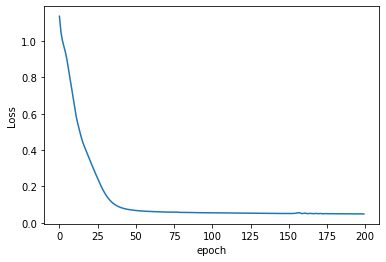

In [33]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

### Predicting 

In [38]:
predict_out = Model(xtest)
_, predict_y = torch.max(predict_out, 1)

In [39]:
predict_y

tensor([0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0,
        1, 2, 0, 2, 0, 0])

In [40]:
print('prediction accuracy :', accuracy_score(ytest.data, predict_y.data))

prediction accuracy : 1.0


### Classification Report

In [46]:
print(classification_report(ytest,predict_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Confusion Matrix

Text(91.68, 0.5, 'predicted label')

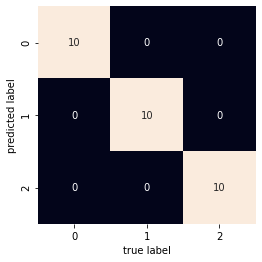

In [52]:
mat = confusion_matrix(ytest, predict_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')



In [42]:
print('macro precision', precision_score(ytest.data, predict_y.data, average='macro'))
print('micro precision', precision_score(ytest.data, predict_y.data, average='micro'))
print('macro recall', recall_score(ytest.data, predict_y.data, average='macro'))
print('micro recall', recall_score(ytest.data, predict_y.data, average='micro'))

macro precision 1.0
micro precision 1.0
macro recall 1.0
micro recall 1.0


### Predicting different way

In [35]:
preds = []
with torch.no_grad():
    for val in xtest:
        y_hat = Model.forward(val)
        preds.append(y_hat.argmax().item())

In [36]:
preds

[0,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 0]